### OvR(One vs Rest)

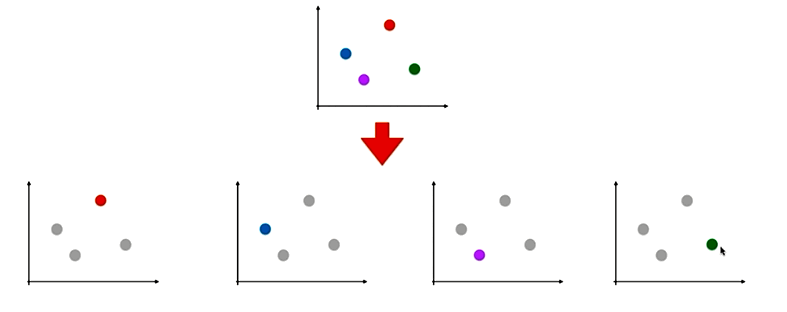

拓展n个类别就进行n次分类， 选择分类得分最高的

### OvO(One vs One)

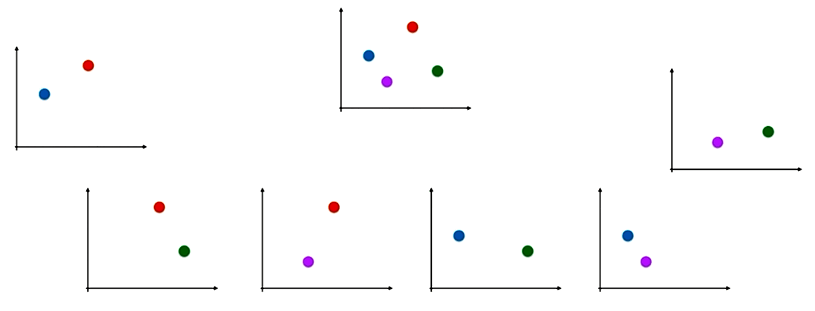

n个分类就进行C(n,2)次分类，选择赢数最高的分类

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [3]:
from sklearn.model_selection import  train_test_split
X_train,X_test, y_train,  y_test = train_test_split(X, y, random_state=88)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
log_reg.score(X_train,y_train)

0.7767857142857143

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


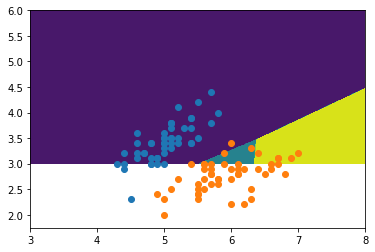

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF69D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)
plot_decision_boundary(log_reg,axis=[3,8,3,6])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [8]:
log_reg2 =LogisticRegression(multi_class='multinomial', solver="newton-cg")

In [9]:
log_reg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
log_reg2.score(X_train,y_train)

0.7767857142857143

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


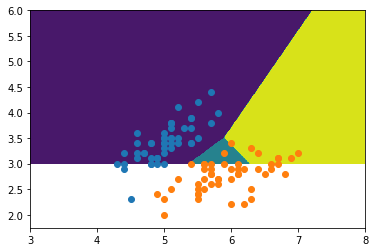

In [11]:
plot_decision_boundary(log_reg2,axis=[3,8,3,6])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

使用所有数据

In [12]:
X = iris.data
y =iris.target
X_train,X_test, y_train,  y_test = train_test_split(X, y, random_state=88)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_train,y_train)

0.9732142857142857

In [14]:
log_reg2 =LogisticRegression(multi_class='multinomial', solver="newton-cg")
log_reg2.fit(X_train, y_train)
log_reg2.score(X_train,y_train)

0.9732142857142857

### OvO and OvR

In [15]:
from sklearn.multiclass import OneVsOneClassifier

In [16]:
ovr = OneVsOneClassifier(log_reg)
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

0.9736842105263158

In [17]:
from sklearn.multiclass import OneVsRestClassifier
ovo = OneVsRestClassifier(log_reg)
ovo.fit(X_train,y_train)
ovo.score(X_test,y_test)

0.8947368421052632